# Introduction to Numpy and Matplotlib

Numpy and Matplotlib are the two most fundamental modules in python. We will learn how to generate n-Dimensional numpy arrays and plot them.


### Numpy tutorials
 Python lists can contain any type, while numpy arrays have to be declared with the same type of data (integers, floats, strings etc ). Numpy arrays can be of multi dimensions, though their dimensions are fixed once declared.
Numpy arrays support arithmetic operations.
There are numerous tutorials to get help. https://www.earthdatascience.org/courses/intro-to-earth-data-science/scientific-data-structures-python/numpy-arrays/

In [1]:
# import module
import numpy as np

# define an array of dimension one from.
#this is a list of floats:
a=[0.7 , 0.75, 1.85]
# convert a list to a numpy array
a_nparray = np.array(a)

### 1D arrays in Numpy

In [ ]:
# create 1D arrays
N=100
x_int = np.arange(N)# this will make a vector of int from 0 to N-1
print(x_int)

In [ ]:
N = 100 # number of points

# linearly spaced vectors
x_lat = np.linspace(39,50,N)# this will make a vector of floats from min to max values evenly spaced
x_lon = np.linspace(-128,-125,N)# same for longitude
print(x_lat)
print(x_lon)


# time vectors
x_t = np.linspace(0,100,N)
dt=x_t[1]
print(dt)

# logspaced vectors
# 10^(-1) -> 10^(1) => 0.1 - 1
x_tl = np.logspace(-1,1,N)

print(x_tl)


## Some Matplotlib

**Some tips from Sofware-Carpentry**

- Make sure your text is **large** enough to read. Use the fontsize parameter in  <code>xlabel</code>, <code> ylabel</code>, <code>title</code>, and <code>legend</code>, and <code>tick_params</code> with labelsize to increase the text size of the numbers on your axes.

- Similarly, you should make your graph elements easy to see. Use s to increase the size of your scatterplot markers and linewidth to increase the sizes of your plot lines.

- Using color (and nothing else) to distinguish between different plot elements will make your plots unreadable to anyone who is colorblind, or who happens to have a black-and-white office printer. For lines, the linestyle parameter lets you use different types of lines. For scatterplots, marker lets you change the shape of your points. If youâ€™re unsure about your colors, you can use Coblis or Color Oracle to simulate what your plots would look like to those with colorblindness.

In [10]:
# make the plots appear in the notebook
%matplotlib inline 
import matplotlib.pyplot as plt
# import matplotlib.pylab as pylab

# set default parameters
params = {'legend.fontsize': 14, \
          'xtick.labelsize':14, \
          'ytick.labelsize':14, \
          'font.size':14}
plt.rcParams.update(params)

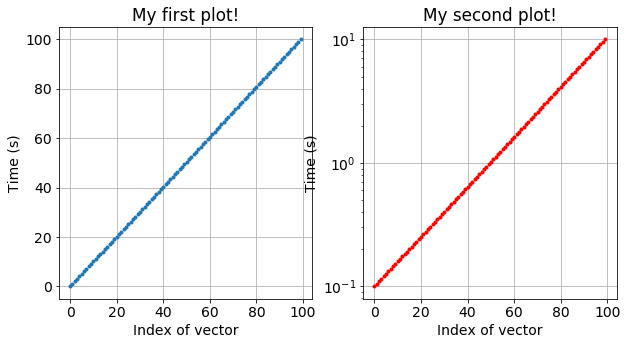

In [11]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(10,5))  # 1 row, 2 co
ax1.plot(x_t,'.')
ax2.plot(x_tl,'r.');ax2.set_yscale('log')
ax2.set_xlabel('Index of vector')
ax1.set_xlabel('Index of vector')
ax2.set_ylabel('Time (s)')
ax1.set_ylabel('Time (s)')
ax1.set_title('My first plot!')
ax2.set_title('My second plot!')
ax1.grid(True)
ax2.grid(True)
plt.savefig('plot_test.png')

## create random fields
Find some basic function from the statistics functions in Numpy:
https://numpy.org/doc/stable/reference/routines.statistics.html

In [12]:
# generate random fields
from numpy import random

N=10000 # number of samples
# Uniform distribution
x1=2*random.rand(N)-1    # uniform distribution centered at 0, varying between -1 and 2.
# Gaussian distribution
x2=random.randn(N)   # Gaussian distribution with a standard deviation of 1
# Power law
a=2 # power of the distribution
x3=random.power(a,N)
# poisson
aa=4
x4=random.poisson(aa,N)

Text(0.5,1,'Poisson')

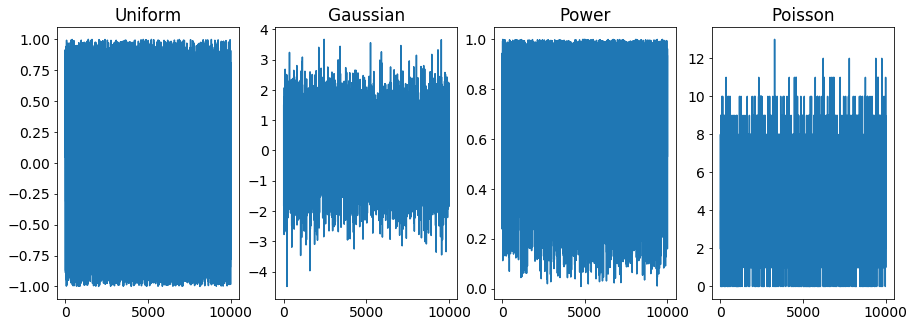

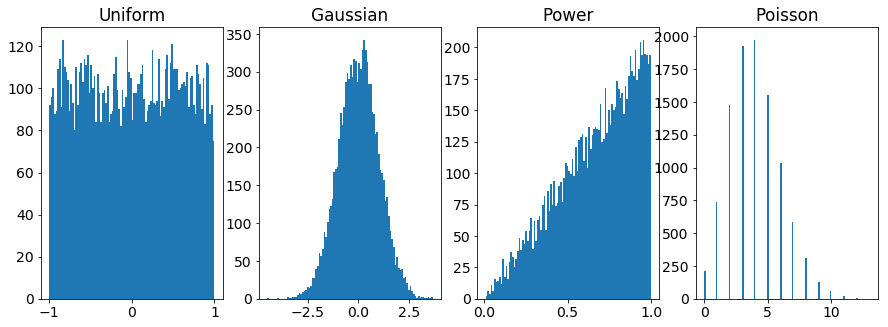

In [13]:
# now compare this distribution to the Gaussian distribution
fig1, (ax1,ax2,ax3,ax4) = plt.subplots(1,4, figsize=(15,5))  # 1 row, 2 co
ax1.plot(x1);ax1.set_title('Uniform')
ax2.plot(x2);ax2.set_title('Gaussian')
ax3.plot(x3);ax3.set_title('Power')
ax4.plot(x4);ax4.set_title('Poisson')


# plot the 2 histograms
fig2, (ax11,ax12,ax13,ax14) = plt.subplots(1,4, figsize=(15,5))  # 1 row, 2 co
ax11.hist(x1,bins=100);ax11.set_title('Uniform')
ax12.hist(x2,bins=100);ax12.set_title('Gaussian')
ax13.hist(x3,bins=100);ax13.set_title('Power')
ax14.hist(x4,bins=100);ax14.set_title('Poisson')

In [14]:
# numpy has built-in functions to calculate basic statistical properties of numpy arrays
print("mean of x1", "standard deviation of x1","mean of x2", "standard deviation of x2",)
print(np.mean(x1),np.std(x1),np.mean(x2),np.std(x2))

mean of x1 standard deviation of x1 mean of x2 standard deviation of x2
-0.0018901814748874092 0.5766916550618811 0.005403145612660553 0.999963563036073


## 2D arrays in Numpy

In [ ]:
N=1000 # number of samples
# create
# Uniform distribution
x1=2*random.rand(N,N)-1    # uniform distribution centered at 0, varying between -1 and 2.
# Gaussian distribution
x2=random.randn(N,N)   # Gaussian distribution with a standard deviation of 1
# Power law
a=2 # power of the distribution
x3=random.power(a,[N,N])
# poisson
aa=4
x4=random.poisson(aa,[N,N])

# now compare this distribution to the Gaussian distribution
fig, (ax1,ax2,ax3,ax4) = plt.subplots(1,4, figsize=(26,4))  # 1 row, 2 co
ax1.pcolor(x1,vmin=-1, vmax=1)
ax2.pcolor(x2,vmin=-1, vmax=1)
ax3.pcolor(x3,vmin=-1, vmax=1)
ax4.pcolor(x4,vmin=0, vmax=10)

## Comparing 1D and 2D arrays
Comparing data often means calculating a distance or dissimilarity between the two data. Similarity is equialent to proximity of two data.

**Euclidian distance**

$L_2$ norm of the residual between 2 vectors:

$d = ||X -Y||_2 = \sqrt{\sum_i^N \left(X_i^2 - Y_i^2 \right) / N} $
In numpy that is the default norm of the linear algebra module linalg: <code> d=np.linalg.norm(X-Y) </code>

**Total variation distance**

Is the $L_1$-norm equivalent of the Euclidian distance:  <code> d=np.linalg.norm(X-Y,ord=1) </code>


**Pearson coefficient (aka the correlation coefficient)**

$ P(X,Y) = \frac{cov(X,Y)}{std(Xstd(Y)} $

$ P(X,Y) = \frac{  \sum{ (X_i-mean(X)) (Y_i-mean(Y)}}{\sqrt{\sum{ (X_i-mean(X))^2 } \sum{ (Y_i-mean(Y))^2 } }} $

the three distances are:
0.04573643330664179 1154.3344458299107 -0.06513765706213502


Text(0,0.5,'X3')

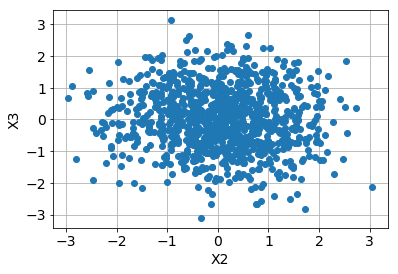

In [18]:
# cross correlate 2 vectors:

x2=random.randn(N)   # Gaussian distribution 
x3=random.randn(N)   # Gaussian distribution 

# Euclidian distance:
d2=np.linalg.norm(x3-x2)
# Total variation distance:
d1=np.linalg.norm(x3-x2,ord=1)
# Pearson coefficient
r = np.corrcoef(x2,x3)[0,1]

print("the three distances are:")
print(d2,d1,r)

plt.plot(x2,x3,'o');plt.grid(True)
plt.xlabel('X2');plt.ylabel('X3')


## Read a real geoscience data file
Now we are going to read a CSV file of the PNSN earthquake catalog and plot the seismicity.

In [20]:
# now we are going to open and read each line of a CSV file.
# at each line, we append the earthquake information to their list
import csv
# first we initialize the python lists for basic earthquake properties
with open('pnsn_catalog.csv', 'r') as file:
    reader = list(csv.reader(file, delimiter = ','))
    L=len(reader)
    # sanity check
    print("There are "+str(L)+" earthquakes in the catalog")
    print(f"There are {L} earthquakes in the catalog")
    mag=np.zeros(L);depth=np.zeros(L)
    lat=np.zeros(L);lon=np.zeros(L)
    mat = np.zeros((L,L)) #make sure you check
    for i,row in enumerate(reader[1:]):
        mag[i]=row[1] # 2nd row.
        lat[i]=row[-4] # before^2-last row
        lon[i]=row[-3] # before-last row
        depth[i]=row[-2] # last row

There are 3203 earthquakes in the catalog
There are 3203 earthquakes in the catalog


Text(0.5,0,'Local magnitude')

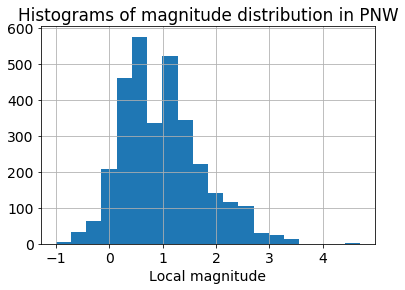

In [21]:
# now we are going to analyze the magnitude distribution of earthquakes in the PNW
plt.hist(mag,bins=20);plt.grid(True);plt.title('Histograms of magnitude distribution in PNW')
plt.xlabel('Local magnitude')

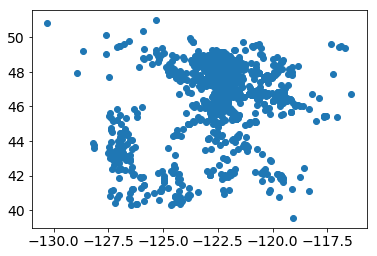

In [22]:
# plot their location
plt.scatter(lon[lon!=0],lat[lat!=0])

### Plot Alaska earthquake catalog 

In [23]:
# now we are going to open and read each line of a CSV file.
# at each line, we append the earthquake information to their list
import csv
# first we initialize the python lists for basic earthquake properties
with open('quake_catalog_montague_island.csv', 'r') as file:
    reader = list(csv.reader(file, delimiter = ','))
    L=len(reader)
    # sanity check
    print("there are "+str(L)+" earthquakes in the catalog")
    print(f"There are {L} earthquakes in the catalog")
    mag=np.zeros(L);depth=np.zeros(L)
    lat=np.zeros(L);lon=np.zeros(L)
    for i,row in enumerate(reader[1:]):
        mag[i]=row[4] # 5th row
        lat[i]=row[1] # 2nd row
        lon[i]=row[2] # before-last row
        depth[i]=row[3] # last row

there are 8363 earthquakes in the catalog
There are 8363 earthquakes in the catalog


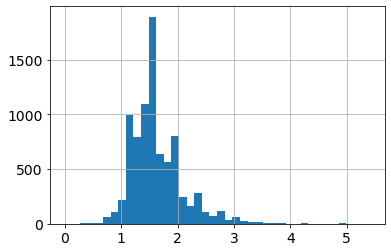

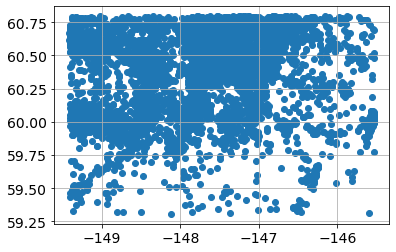

In [92]:
# now we are going to analyze the magnitude distribution of earthquakes in the PNW
plt.hist(mag,bins=40);plt.grid(True)
# plot their location
fig=plt.figure()
plt.scatter(lon[lon!=0],lat[lat!=0]);plt.grid(True)